# What happen inside layers

### Set up

In [1]:
import tensorflow as tf


gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Load image

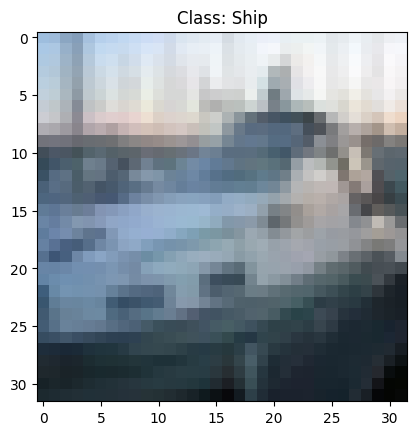

In [2]:
import numpy as np
import matplotlib.pyplot as plt


class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 
               'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

idx = 2

image = x_test[idx]
label = y_test[idx]

# Display the image
plt.imshow(image)
plt.title(f"Class: {class_names[label[0]]}")
plt.axis('on')
plt.show()

## Normalize

In [3]:
image = image / 255.0

## Support plotting function

In [4]:
def plot(image, num_image: int = 4, cmap='viridis'):
    plt.figure(figsize=(8, 8))
    for i in range(num_image):
        plt.subplot(1, num_image, i + 1)  # where the image will be
        plt.imshow(image[0, :, :, i],  # batch size, rows, columns, filters
                   cmap=cmap)
        plt.axis('off')
    plt.show()

## Normal model

In [5]:
# load model
normal = tf.keras.models.load_model('best.h5')
normal.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 re_lu_4 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 re_lu_5 (ReLU)              (None, 15, 15, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                  

In [6]:
# display all the layers of the model
normal.layers

In [7]:
len(normal.layers)  # number of layers

12

1/1 [==============================] - 2s 2s/step
conv2d_4


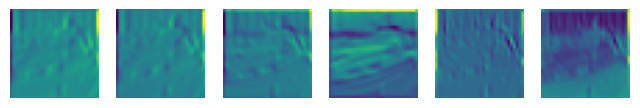

1/1 [==============================] - 0s 32ms/step
re_lu_4


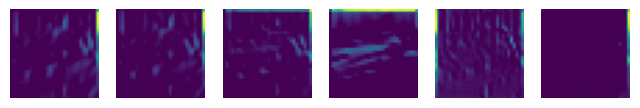

1/1 [==============================] - 0s 62ms/step
max_pooling2d_4


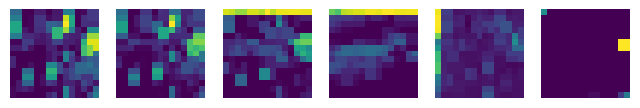

1/1 [==============================] - 0s 54ms/step
conv2d_5


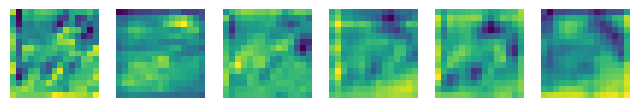

1/1 [==============================] - 0s 46ms/step
re_lu_5


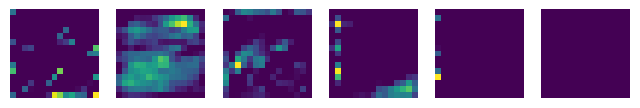

1/1 [==============================] - 0s 185ms/step
max_pooling2d_5


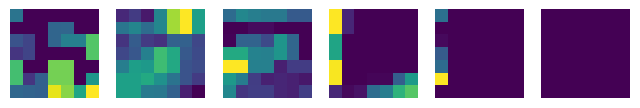

1/1 [==============================] - 0s 65ms/step
conv2d_6


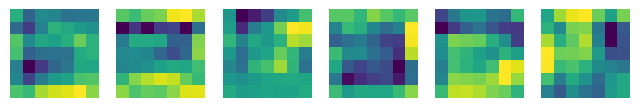

1/1 [==============================] - 0s 49ms/step
re_lu_6


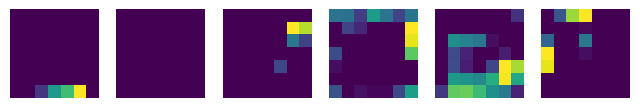

In [8]:
from keras.models import Model


# loop through all layers a plot 4 first filters
for layer in normal.layers[0: 12-4]:
    out = Model(inputs=normal.input, outputs=layer.output)
    out = out.predict(np.expand_dims(image, axis=0))
    print(layer.name)
    plot(out, num_image=6, cmap='viridis')

1/1 [==============================] - 0s 31ms/step
conv2d_4


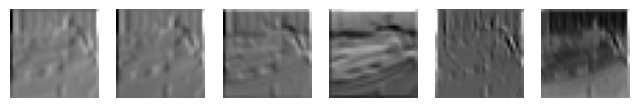

1/1 [==============================] - 0s 43ms/step
re_lu_4


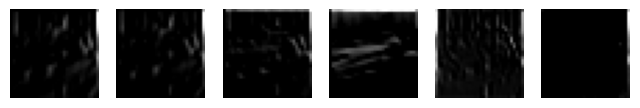

1/1 [==============================] - 0s 29ms/step
max_pooling2d_4


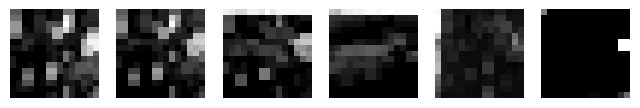

1/1 [==============================] - 0s 46ms/step
conv2d_5


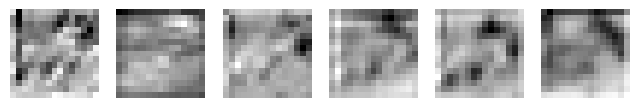

1/1 [==============================] - 0s 40ms/step
re_lu_5


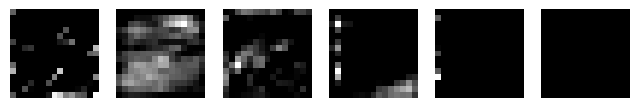

1/1 [==============================] - 0s 42ms/step
max_pooling2d_5


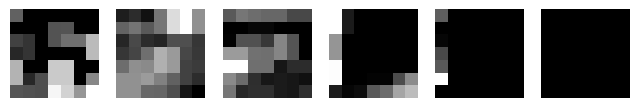

1/1 [==============================] - 0s 54ms/step
conv2d_6


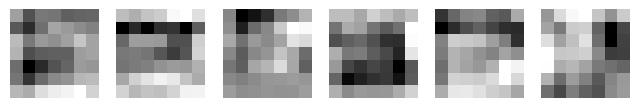

1/1 [==============================] - 0s 45ms/step
re_lu_6


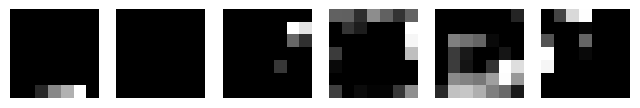

In [9]:
# similar with the previous but in gray image mode
for layer in normal.layers[0: 12-4]:
    out = Model(inputs=normal.input, outputs=layer.output)
    out = out.predict(np.expand_dims(image, axis=0))
    print(layer.name)
    plot(out, num_image=6, cmap='gray')

## Resnet model

In [10]:
# load model
resnet = tf.keras.models.load_model("resnet.h5")
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 re_lu_10 (ReLU)                (None, 32, 32, 32)   0           ['conv2d_10[0][0]']              
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 15, 15, 32)  0           ['re_lu_10[0][0]']               
 )                                                                                            

In [11]:
resnet.layers  # display all the layers of the model

In [12]:
len(resnet.layers)  # number of layers

31

1/1 [==============================] - 0s 33ms/step
conv2d_10


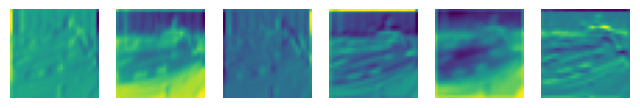

1/1 [==============================] - 0s 34ms/step
re_lu_10


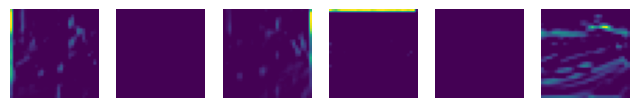

1/1 [==============================] - 0s 31ms/step
max_pooling2d_10


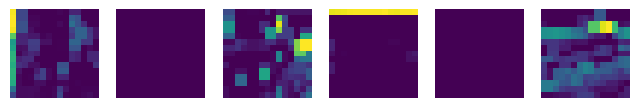

1/1 [==============================] - 0s 43ms/step
conv2d_11


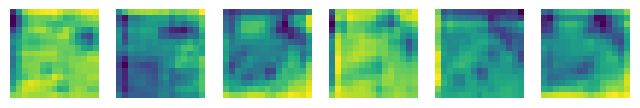

1/1 [==============================] - 0s 35ms/step
re_lu_11


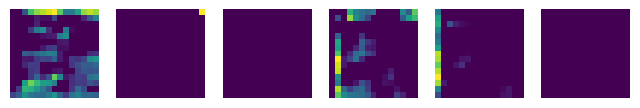

1/1 [==============================] - 0s 152ms/step
conv2d_12


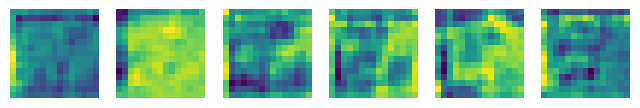

1/1 [==============================] - 0s 45ms/step
conv2d_13


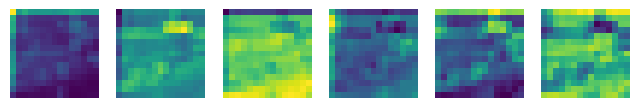

1/1 [==============================] - 0s 53ms/step
add


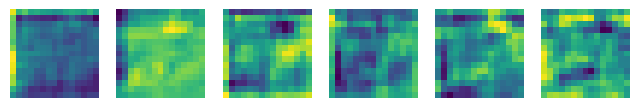

1/1 [==============================] - 0s 57ms/step
re_lu_12


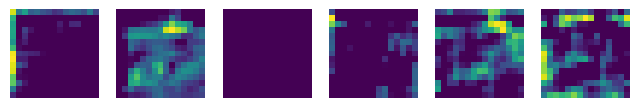

1/1 [==============================] - 0s 55ms/step
conv2d_14


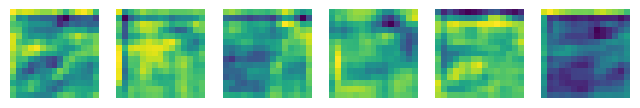

1/1 [==============================] - 0s 55ms/step
re_lu_13


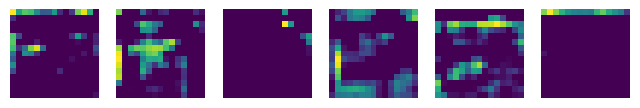

1/1 [==============================] - 0s 140ms/step
conv2d_15


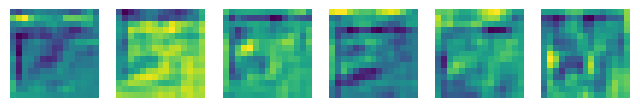

1/1 [==============================] - 0s 55ms/step
conv2d_16


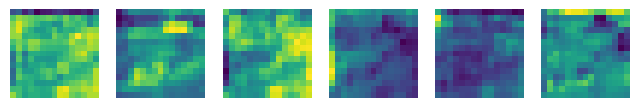

1/1 [==============================] - 0s 69ms/step
add_1


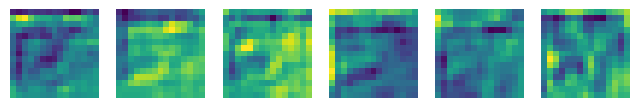

1/1 [==============================] - 0s 66ms/step
re_lu_14


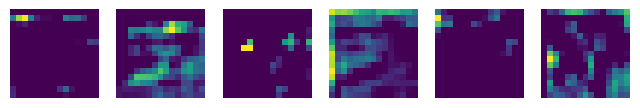

1/1 [==============================] - 0s 92ms/step
conv2d_17


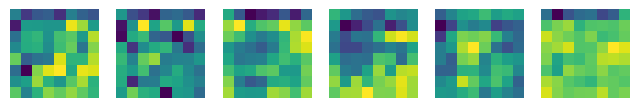

1/1 [==============================] - 0s 69ms/step
re_lu_15


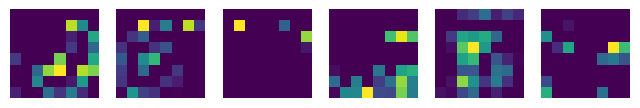

1/1 [==============================] - 0s 145ms/step
conv2d_18


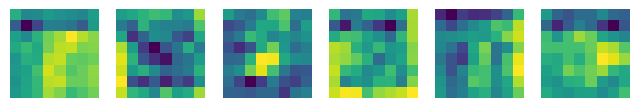

1/1 [==============================] - 0s 92ms/step
conv2d_19


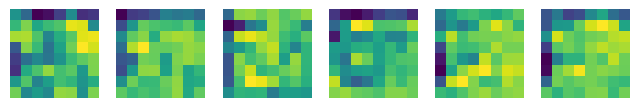

1/1 [==============================] - 0s 84ms/step
add_2


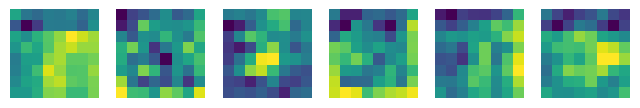

1/1 [==============================] - 0s 91ms/step
re_lu_16


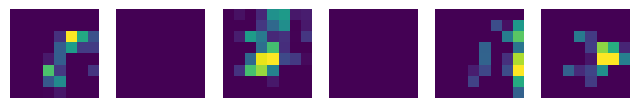

1/1 [==============================] - 0s 89ms/step
conv2d_20


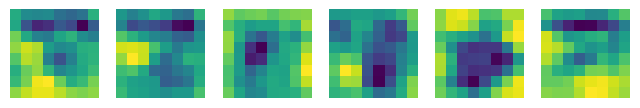

1/1 [==============================] - 0s 143ms/step
re_lu_17


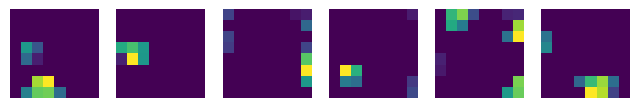

1/1 [==============================] - 0s 306ms/step
conv2d_21


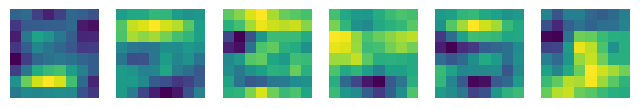

1/1 [==============================] - 0s 106ms/step
conv2d_22


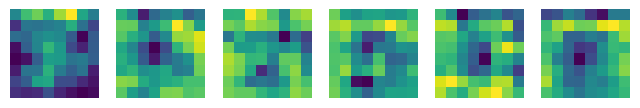

1/1 [==============================] - 0s 85ms/step
add_3


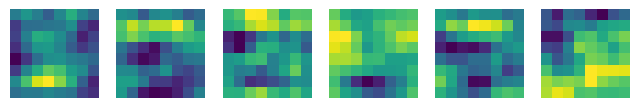

In [13]:
# begin from 1 because the Input layer has nothing to show
# 31-4 because we don't need to see layers since the global average pooling 
for layer in resnet.layers[1: 31-4]:
    out = Model(inputs=resnet.input, outputs=layer.output)
    out = out.predict(np.expand_dims(image, axis=0))
    print(layer.name)
    plot(out, num_image=6, cmap='viridis')

1/1 [==============================] - 0s 34ms/step
conv2d_10


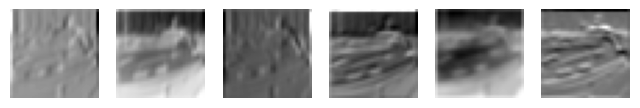

1/1 [==============================] - 0s 37ms/step
re_lu_10


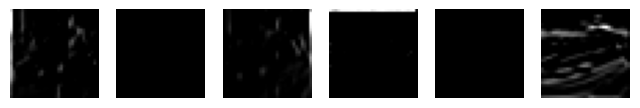

1/1 [==============================] - 0s 39ms/step
max_pooling2d_10


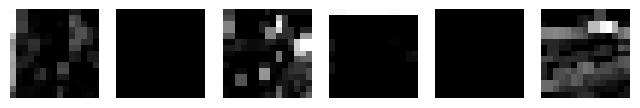

1/1 [==============================] - 0s 36ms/step
conv2d_11


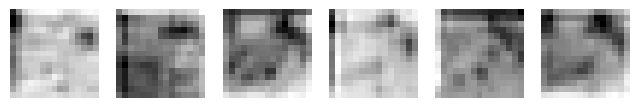

1/1 [==============================] - 0s 36ms/step
re_lu_11


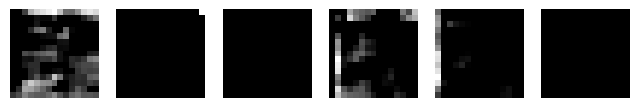

1/1 [==============================] - 0s 56ms/step
conv2d_12


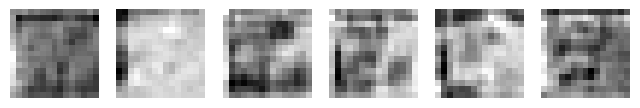

1/1 [==============================] - 0s 36ms/step
conv2d_13


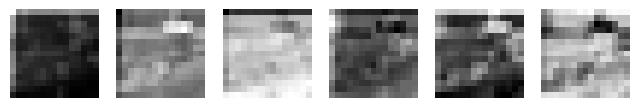

1/1 [==============================] - 0s 46ms/step
add


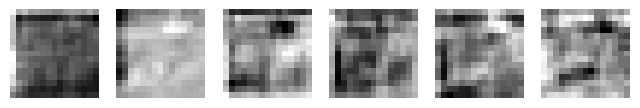

1/1 [==============================] - 0s 53ms/step
re_lu_12


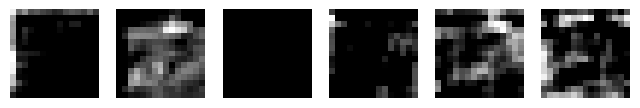

1/1 [==============================] - 0s 59ms/step
conv2d_14


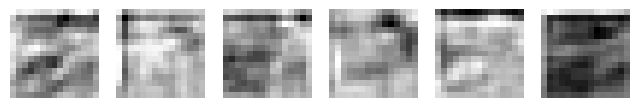

1/1 [==============================] - 0s 76ms/step
re_lu_13


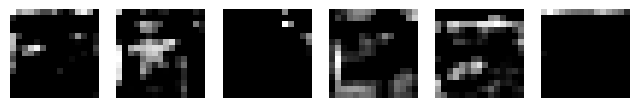

1/1 [==============================] - 0s 58ms/step
conv2d_15


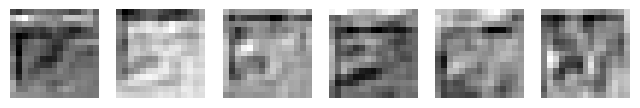

1/1 [==============================] - 0s 61ms/step
conv2d_16


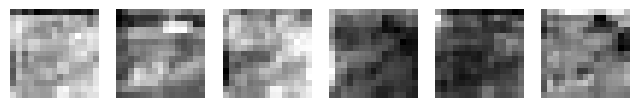

1/1 [==============================] - 0s 74ms/step
add_1


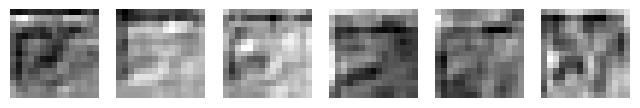

1/1 [==============================] - 0s 72ms/step
re_lu_14


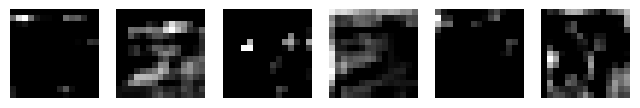

1/1 [==============================] - 0s 65ms/step
conv2d_17


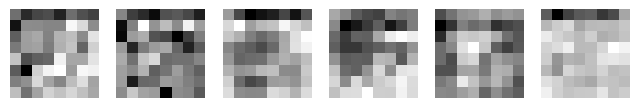

1/1 [==============================] - 0s 81ms/step
re_lu_15


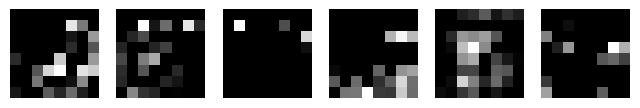

1/1 [==============================] - 0s 81ms/step
conv2d_18


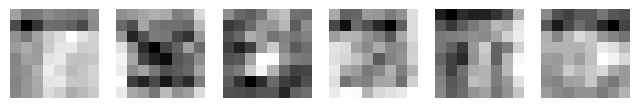

1/1 [==============================] - 0s 65ms/step
conv2d_19


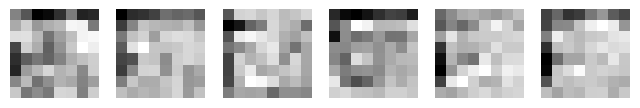

1/1 [==============================] - 0s 87ms/step
add_2


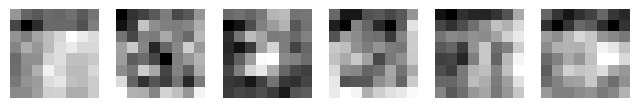

1/1 [==============================] - 0s 75ms/step
re_lu_16


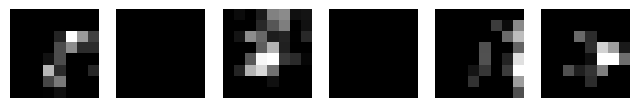

1/1 [==============================] - 0s 79ms/step
conv2d_20


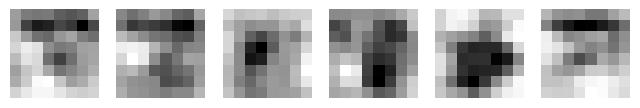

1/1 [==============================] - 0s 85ms/step
re_lu_17


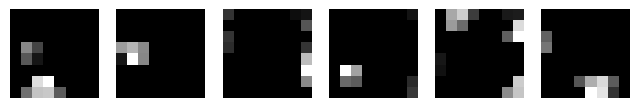

1/1 [==============================] - 0s 81ms/step
conv2d_21


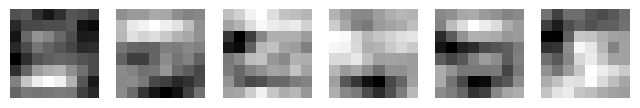

1/1 [==============================] - 0s 77ms/step
conv2d_22


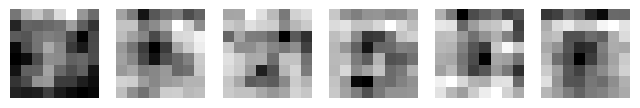

1/1 [==============================] - 0s 118ms/step
add_3


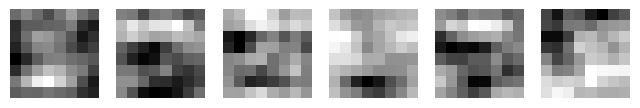

In [14]:
for layer in resnet.layers[1: 31-4]:
    out = Model(inputs=resnet.input, outputs=layer.output)
    out = out.predict(np.expand_dims(image, axis=0))
    print(layer.name)
    plot(out, num_image=6, cmap='gray')